In [ ]:
# default_exp data.load

In [ ]:
#export
from snkrfinder.imports import *
from snkrfinder.core import *
from snkrfinder.data.munge import *

import scipy.io as sio
from sklearn.model_selection import train_test_split
### might be fastai wrappers to do this elegantly... (untar_data?)
import os
import shutil


In [ ]:

#hide
from nbdev.showdoc import *


# DEPRICATED!!!

We'll just keep everything where it is and use dataframes to organize the Train Test and excluded images

# snkrfinder.data.load

### version 1.0 Dec 2020 (refactor using pytorch/nbdev/fastai framework)

## OVERVIEW

This is a project initiated while an Insight Data Science fellow.  It grew out of thinking about how to make data-driven tools that could impact the fashion industry which I had been working working in.   The original over-scoped idea was to make a shoe desighn tool which could quickly develop some sneaker designs based on choosing some examples, and some text descriptors.  Designs are constrained by the "latent space" defined (discovered?) by a database of shoe images.  However, given the 3 week sprint allowed for development, I pared the tool down to a simple "aesthetic" recommender for sneakers, using the same idea of utilizing an embedding space defined by the database fo shoe images.

NOTE:  symbolic link in the nbs directory to enable the module loads in these notebooks.  i.e. `ln -s ../snkrfinder/ snkrfinder`


### A: load databases / imagefile names to dataframes

### B: organize imagefiles into folders according to meta-data (category/source)

### C: splitters ... e.g. train, valid, test

### D: move files

### E: load and merge scraped data 



This is a cool reference for a fastai VAE
https://medium.com/@dhuynh95/an-introduction-to-unsupervised-learning-with-fastai-a6dbd78eca2b


First we need to get a database of sneaker images.   The sneaker images are only 136 pixels wide, and organized by 'Category', 'SubCategory', and 'Brand'.   Additional semantic information is also available from Mechanical Turk labeling, and is available packed into matlab files.  

In [ ]:
#hide

print(Path().cwd())
os.chdir(L_ROOT)
print(Path().cwd())

/home/ergonyc/Projects/Project2.0/snkrfinder/nbs
/home/ergonyc/Projects/Project2.0/snkrfinder


## Part 0: DATA

### Part 1: import the UT-Zappos50k database

Using fastai `untar_data`.

## Do Train Test Splits


In [ ]:
#hide
# UPDATE - JAH, put all data into DATABASE 
im_path = D_ROOT/DBS['zappos'] #'ut-zap50k-images'

lpath = './data'

In [ ]:
#export

def add_subdir(root,dname):
    l_path = os.path.join(root,dname)
    if not os.path.exists(l_path):
        os.makedirs(l_path)
    return l_path

def creat_full_local_categorydirs(df,lpath,dpath=None):
    # create full set
    print('_'*30)
    print('Creating full local category set....')
    print('_'*30)
    ldata_path = add_subdir(lpath,'raw')
    data_path = dpath if dpath is not None else D_ROOT/DBS['zappos']

    train_path = add_subdir(lpath,'train')
    val_path = add_subdir(lpath,'validate')
    test_path = add_subdir(lpath,'test')

    n_copied = 0
    train_moved = 0
    val_moved = 0
    test_moved = 0
    for idx in df.index:        
        save_path = add_subdir(ldata_path,df.loc[idx,'Category'])
        img =  os.path.join(data_path,df.loc[idx,'path'])
        shutil.copy2(img,save_path)
        n_copied += 1
        
        save_path = add_subdir(ldata_path,df.loc[idx,'Category'])
        img =  os.path.join(data_path,df.loc[idx,'path'])
        shutil.copy2(img,save_path)
        train_moved += 1
    return n_moved



In [ ]:
#export

def create_test_train_directories(df,lpath,dpath=None):
    "copy the database and split images into test/train sub-directories"
    def _sort_ttv(img,ldata_path,ttv,nttv):
        if ttv=='train':
            nttv['train'] += 1
            save_path = add_subdir(os.path.join(lpath,'train'),df.loc[idx,'Category'])
            shutil.copy2(img,save_path)
        elif ttv=='test':
            nttv['test'] += 1
            save_path = add_subdir(os.path.join(lpath,'test'),df.loc[idx,'Category'])
            shutil.copy2(img,save_path)
        elif ttv=='valid':
            nttv['valid'] += 1
            save_path = add_subdir(os.path.join(lpath,'validate'),df.loc[idx,'Category'])
            shutil.copy2(img,save_path)
        else:
            print(f"error:{img} not t t v")  #TODO: make this propagate an error instead of 
            
    data_path = dpath if dpath is not None else D_ROOT/DBS['zappos']

    ldata_path = add_subdir(lpath,'raw')

    train_path = add_subdir(lpath,'train')
    val_path = add_subdir(lpath,'valid')
    test_path = add_subdir(lpath,'test')
    
    nttv = {'train':0,'test':0,'valid':0}
    # create test set (copies everything...)
    print('_'*30)
    print('Creating full train/test/validate set (+raw copy)....')
    print('_'*30)

    n_moved = 0
    for idx in df.index:        
        save_path = add_subdir(ldata_path,df.loc[idx,'Category'])
        img =  os.path.join(data_path,df.loc[idx,'path'])
        shutil.copy2(img,save_path)
        n_moved += 1
        
        ttv = df.loc[idx,'t_t_v']
        # now copy it to the destination
        _sort_ttv(img,ldata_path,ttv,nttv)

        #     n_train = nttv['train']
        #     n_valid = nttv['validate']
        #     n_test = nttv['test']

    return n_moved, nttv['train'], nttv['valid'], nttv['test']


In [ ]:
#n_images = creat_full_local_categorydirs(df,lpath)
if False:
    n_images, n_train, n_val, n_test = create_test_train_directories(df,lpath)
    n_images,n_train,n_val,n_test


NameError: name 'df' is not defined

In [ ]:
Path(lpath).ls()

(#58) [Path('data/resnet50-features_large.pkl'),Path('data/resnet18-features_medium.pkl'),Path('data/mobilenet_v2-knn9Xsize.pkl'),Path('data/umapXsize.pkl'),Path('data/scraped'),Path('data/resnet34-knnXsize_nn5.pkl'),Path('data/xresnet18-umapXsize.pkl'),Path('data/resnet18-umapXsize.pkl'),Path('data/zappos-50k-mobilenetv2-features_sort_3.pkl'),Path('data/zappos-50k-simplified.pkl')...]

------------

## ImageDataLoader instead of block API 

TODO: STASH

alternative format... just park here until i can stash it away.

In [ ]:
dls = ImageDataLoaders.from_folder()


from_df(df, path=im_path,fn_col='path',label_col='Category',valid_pct=0.0)

NameError: name 'df' is not defined

In [ ]:
dls = ImageDataLoaders.from_df(df, path=im_path,fn_col='path',label_col='Category',valid_pct=0.0)

NameError: name 'df' is not defined

In [ ]:
dls[0].show_batch()

NameError: name 'dls' is not defined

In [ ]:

# # we 
# # put everythign in train, and don't do any augmentation since we are just going 
# def get_x(r): return im_path/r['path']
# def get_y(r): return r['Category']

# def get_feat(r): return r['path']



In [ ]:
def dblock_zap_loader(im_path=None,feats=True, aug=False):

    tfms = [] if ~aug else aug_transforms(mult=1.0, 
               do_flip=True, 
               flip_vert=False, 
               max_rotate=5.0, 
               min_zoom=1.0, 
               max_zoom=1.05, 
               max_lighting=0.1, 
               max_warp=0.05, 
               p_affine=0.75, 
               p_lighting=0.0, 
               xtra_tfms=None, 
               size=None, 
               mode='bilinear', 
               pad_mode='reflection', 
               align_corners=True, 
               batch=False, 
               min_scale=1.0)
    
    i_path = im_path if im_path is not None else D_ROOT/DBS['zappos']
    
    item_tfms = [Resize(IMG_SIZE,method='pad', pad_mode='border')]
    batch_tfms = [*tfms, Normalize.from_stats(*imagenet_stats)]

    get_x = lambda r: i_path/r['path']
    get_y = lambda r: r['Category'] if feats else lambda r: r['path']

    # resize to 160
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=IndexSplitter([]),
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=item_tfms,
                   batch_tfms=batch_tfms)  # border pads white...
    return dblock
    

In [ ]:
im_path = None
i_path = im_path if im_path is not None else D_ROOT/DBS['zappos']
i_path

Path('/home/ergonyc/Projects/DATABASE/ut-zap50k-images')

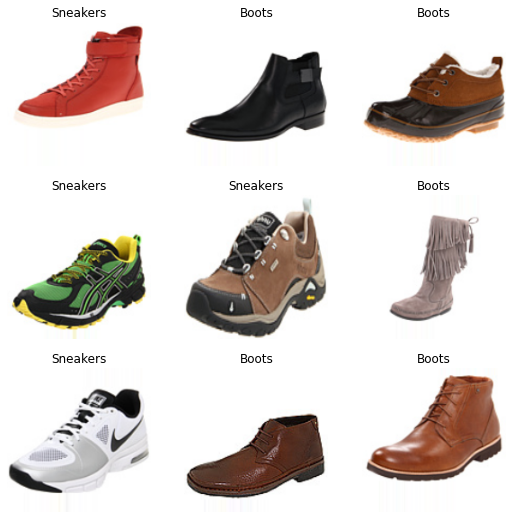

In [ ]:
filename = ZAPPOS_DF_SIMPLIFIED #"zappos-50k-simplified_sort"
df_zappos = pd.read_pickle(f"data/{filename}.pkl")

dblock = dblock_zap_loader()

dls = dblock.dataloaders(df_zappos,bs=64,drop_last=False)


dls.show_batch()

------------

------------

In [ ]:
#hide

from nbdev.export import notebook2script
notebook2script()



Converted 00_core.ipynb.
Converted 01_data.ipynb.
Converted 02a_model.core.ipynb.
Converted 02b_model.transfer.ipynb.
Converted 02c_model.cvae.ipynb.
Converted 04_widgets.ipynb.
Converted index.ipynb.


------------